In [903]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [904]:
!pip3 install catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [905]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [906]:
train_data.shape

(8693, 14)

In [907]:
test_data.shape

(4277, 13)

In [908]:
test_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [909]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [910]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [911]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

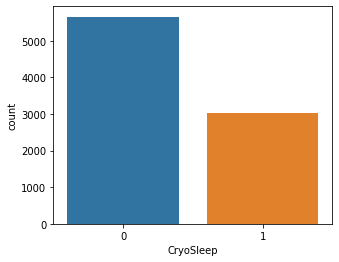

In [912]:
plt.figure(figsize=(5,4))
sns.countplot(x="CryoSleep",data=X)

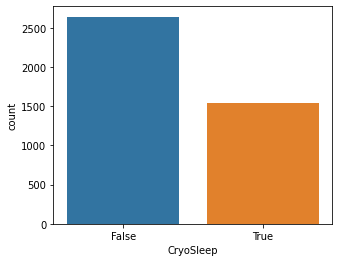

In [913]:
plt.figure(figsize=(5,4))
sns.countplot(x="CryoSleep",data=test_data)

In [914]:
X = train_data.drop(['Transported'], axis=1)
y = train_data.Transported

In [915]:
def data_function(param_1,param_2,data_file_name):
  data_file_name[param_1] = data_file_name[param_2].map(lambda x: int(x.split('_')[0]))

def data_function_cabin(param_name,data_file_name):
  data_file_name['deck'] = data_file_name[param_name].map(lambda x: x.split('/')[0] if not pd.isna(x) else np.nan)
  data_file_name['deck_num'] = data_file_name[param_name].map(lambda x: int(x.split('/')[1]) if not pd.isna(x) else np.nan)
  data_file_name['deck_side'] = data_file_name[param_name].map(lambda x: x.split('/')[2] if not pd.isna(x) else np.nan)

def data_function_name(param_name,data_file_name):
  data_file_name['f_name'] = data_file_name[param_name].map(lambda x: x.split()[0] if not pd.isna(x) else np.nan)
  data_file_name['l_name'] = data_file_name[param_name].map(lambda x: x.split()[1] if not pd.isna(x) else np.nan)

In [916]:
data_function('id','PassengerId',X)
data_function('group_no','PassengerId',X)
data_function_cabin('Cabin',X)
data_function_name('Name',X)
X = X.drop(['Name'], axis=1)
X = X.drop(['Cabin'], axis=1)
X = X.drop(['PassengerId'], axis=1)
X.sample(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,id,group_no,deck,deck_num,deck_side,f_name,l_name
6382,Europa,True,TRAPPIST-1e,31.0,False,NaN,0.0,0.0,0.0,0.0,6747,6747,C,215.0,P,Duhrak,Alaxed
1205,Mars,True,TRAPPIST-1e,10.0,False,0.0,0.0,0.0,0.0,0.0,1286,1286,F,248.0,S,Jackix,Fache
8452,Mars,False,TRAPPIST-1e,17.0,False,3146.0,0.0,87.0,135.0,0.0,9029,9029,D,287.0,P,Ockies,Berle
8316,Earth,False,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,906.0,8878,8878,E,568.0,P,Tracek,Rames
7024,Mars,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,7479,7479,F,1429.0,S,Muffs,Berte


In [917]:
passenger_backup_list = test_data.PassengerId;
data_function('id','PassengerId',test_data)
data_function('group_no','PassengerId',test_data)
data_function_cabin('Cabin',test_data)
data_function_name('Name',test_data)
test_data = test_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['PassengerId'], axis=1)
test_data.sample(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,id,group_no,deck,deck_num,deck_side,f_name,l_name
921,Earth,False,TRAPPIST-1e,56.0,False,0.0,35.0,4661.0,1641.0,0.0,1912,1912,G,310.0,P,Ruthy,Beckeetter
342,Earth,False,TRAPPIST-1e,29.0,False,60.0,480.0,5.0,0.0,276.0,731,731,F,136.0,S,Jessa,Cleang
3640,Earth,False,55 Cancri e,31.0,False,28.0,48.0,0.0,0.0,622.0,7931,7931,E,523.0,S,Raque,Sykess
1094,Earth,False,TRAPPIST-1e,43.0,False,340.0,10.0,22.0,0.0,272.0,2324,2324,F,452.0,S,Melvia,Lessonerry
705,Earth,False,PSO J318.5-22,48.0,False,2.0,0.0,0.0,783.0,0.0,1464,1464,G,232.0,P,Aliedy,Combson


In [918]:
X.f_name.fillna(random.choice(X.f_name[X.f_name.notna()]), inplace=True)
X.l_name.fillna(random.choice(X.l_name[X.l_name.notna()]), inplace=True)
test_data.f_name.fillna(random.choice(X.f_name[X.f_name.notna()]), inplace=True)
test_data.l_name.fillna(random.choice(X.l_name[X.l_name.notna()]), inplace=True)

In [919]:
X = X.fillna({'HomePlanet' : 'Earth', 'CryoSleep': False,\
              'Destination': 'TRAPPIST-1e', 'Age': X.Age.median(), 'VIP': False, 'RoomService': X.RoomService.median(), \
              'FoodCourt': X.FoodCourt.median(), 'ShoppingMall': X.ShoppingMall.median(), 'Spa': X.Spa.median(), 'VRDeck': X.VRDeck.median(), \
              'deck': 'G', 'deck_num': 100, 'deck_side': 'P'})

X.CryoSleep = X.CryoSleep.astype(int)
X.VIP = X.VIP.astype(int)

In [920]:
test_data = test_data.fillna({'HomePlanet' : 'Earth', 'CryoSleep': False, \
              'Destination': 'TRAPPIST-1e', 'Age': X.Age.median(), 'VIP': False, 'RoomService': X.RoomService.median(), \
              'FoodCourt': X.FoodCourt.median(), 'ShoppingMall': X.ShoppingMall.median(), 'Spa': X.Spa.median(), '  ': X.VRDeck.median(), \
              'deck': 'G', 'deck_num': 100, 'deck_side': 'P'})

test_data.CryoSleep = test_data.CryoSleep.astype(int)
test_data.VIP = test_data.VIP.astype(int)
y = y.astype(int)

In [921]:
X = X.replace(r'^\s*$', np.nan, regex=True)

In [922]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [ ]:
model_cb = CatBoostClassifier(eval_metric='Accuracy', random_seed=42,iterations=200)
set_cat_features = np.where(X.dtypes != float)[0]

model_cb.fit(X_train, y_train,cat_features=set_cat_features)
y_pred = model_cb.predict(X_test)

In [924]:
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy for the model is: ",accuracy)

The accuracy for the model is:  0.8205521472392638


In [925]:
prediction = model_cb.predict(test_data)
prediction = prediction.astype(bool)
output_file = pd.DataFrame({'Transported': prediction}, index=passenger_backup_list)
output_file.to_csv('output.csv')